<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></div>

In [1]:
## Load libraries and env settings 
%run "../../zUtilz/load_envz.ipynb"
## TODO: refactor 
%run "../../zUtilz/LG_load_envz.ipynb"

In [6]:
## Load dataset
db_deaths = pd.read_csv( "%s/KNBS_et_al/national-registered-deaths-by-major-causes-2010-2013.csv" % DATA_DIR) 
db_diseases = pd.read_csv( "%s/KNBS_et_al/national-top-10-incidences-of-diseases-2009-to-2013.csv" % DATA_DIR) 

#db_deaths.rename(index=str, columns={"Cause":"Death Cause"}) 

#db_deaths[:2].T.head(100)
#db_diseases[:2].T.head(100)
## Clean
db_deaths.head(100)
db_diseases.head(100)

,Cause,2010,2011,2012,2013
0,AIDS,13656,11274,11111,11448
1,Anaemia,7985,7984,8169,8124
2,Cancer,11995,11527,12574,13720
3,Heart disease,4634,4404,5188,4544
4,Malaria,30505,26652,24772,23789
5,Menengitis,4371,4497,4480,4265
6,Other accidents,3757,4726,4630,4857
7,Other causes,70389,73425,79228,84539
8,Pneumonia,22204,22632,22051,22918
9,Road traffic acc,3892,4382,4997,4942


,Disease Name,2009,2010,2011,2012,2013
0,"Accidents (incl. fractures, burns etc)",582881,708721,780908,846287,927861
1,All Other Diseases,6755308,8441917,6701348,7781869,8618536
2,Diarrhoea Diseases,1639945,1818078,2024812,2081487,2226107
3,Disease of the Respiratory System,8017565,9760371,11098928,12215993,14823864
4,Diseases of the Skin (Incl. Ulcers),2109416,2718570,2882050,3051026,3648361
5,Eye Infection,550395,643986,689004,717983,778073
6,Intestinal Worms,387066,419298,374886,357844,349632
7,Malaria,9833701,11371889,11150223,9445107,8808471
8,Pneumonia,1018151,1081317,1100997,1135046,1282996
9,"Rheumatism, Joint pains etc",558539,659192,750888,845397,1081245


In [7]:
# wrangle 
db_deaths = pd.DataFrame( pd.melt(db_deaths, 
                           id_vars="Cause", 
                           value_vars=["{:02d}".format(x) for x in range(2010, 2014)],
                          value_name="Nmb.Cases", var_name="Year") )
db_diseases = pd.DataFrame( pd.melt(db_diseases, 
                           id_vars="Disease Name", 
                           value_vars=["{:02d}".format(x) for x in range(2009, 2014)],
                          value_name="Nmb.Cases", var_name="Year") )


db_deaths.head(7)
db_diseases.head(7)

,Cause,Year,Nmb.Cases
0,AIDS,2010,13656
1,Anaemia,2010,7985
2,Cancer,2010,11995
3,Heart disease,2010,4634
4,Malaria,2010,30505
5,Menengitis,2010,4371
6,Other accidents,2010,3757


,Disease Name,Year,Nmb.Cases
0,"Accidents (incl. fractures, burns etc)",2009,582881
1,All Other Diseases,2009,6755308
2,Diarrhoea Diseases,2009,1639945
3,Disease of the Respiratory System,2009,8017565
4,Diseases of the Skin (Incl. Ulcers),2009,2109416
5,Eye Infection,2009,550395
6,Intestinal Worms,2009,387066


In [9]:
## Compute 
db_deaths["Function"] = "Death Cause"
db_deaths.rename(index=str, columns={"Cause": "Description"}, inplace=True)

db_diseases["Function"] = "Disease Incidence"
db_diseases.rename(index=str, columns={"Disease Name": "Description"}, inplace=True)

db_deaths.head(3)
db_diseases.head(3)

,Description,Year,Nmb.Cases,Function
0,AIDS,2010,13656,Death Cause
1,Anaemia,2010,7985,Death Cause
2,Cancer,2010,11995,Death Cause


,Description,Year,Nmb.Cases,Function
0,"Accidents (incl. fractures, burns etc)",2009,582881,Disease Incidence
1,All Other Diseases,2009,6755308,Disease Incidence
2,Diarrhoea Diseases,2009,1639945,Disease Incidence


In [11]:
## merge
db = db_deaths.append( db_diseases)
db.sample(7)

,Description,Year,Nmb.Cases,Function
30,Pneumonia,2012,22051,Death Cause
7,Malaria,2009,9833701,Disease Incidence
20,Road traffic acc,2011,4382,Death Cause
27,Menengitis,2012,4480,Death Cause
7,Other causes,2010,70389,Death Cause
47,Disease of the Respiratory System,2013,14823864,Disease Incidence
5,Menengitis,2010,4371,Death Cause


# Introduction

In [12]:
pd.pivot_table( db, index=["Year"], columns=["Function"], values=["Nmb.Cases"], 
               aggfunc=sumLog ).plot( kind="line", figsize=(5,9), title="Yearly Trends")

NameError: name 'sumLog' is not defined



 Numbers as at 2013


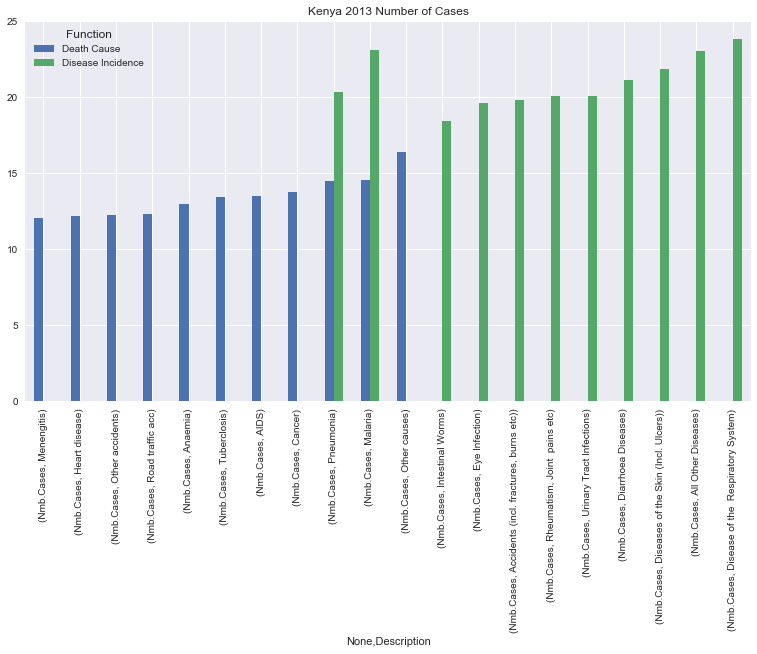

In [63]:
print( "\n\n Numbers as at 2013")
pd.pivot_table( db[ db["Year"]=="2013"], index=["Function"], columns=["Description"], values=["Nmb.Cases"], 
              aggfunc=sumLog, margins=False).T.sort_values( ["Death Cause", "Disease Incidence"] ).plot(
    kind="bar", figsize=(13,7), title="Kenya 2013 Number of Cases") #, color=["Orange","Purple"]) #.sort_values( ( "Nmb.Cases","Malaria") )

In [64]:
#print("\n\n 2013 Ratios")
